In [1]:
from transformers import pipeline 
from youtube_transcript_api import YouTubeTranscriptApi 

In [2]:
youtube_video = "https://www.youtube.com/watch?v=A4OmtyaBHFE"

In [3]:
video_id = youtube_video.split("=")[-1] 
video_id

'A4OmtyaBHFE'

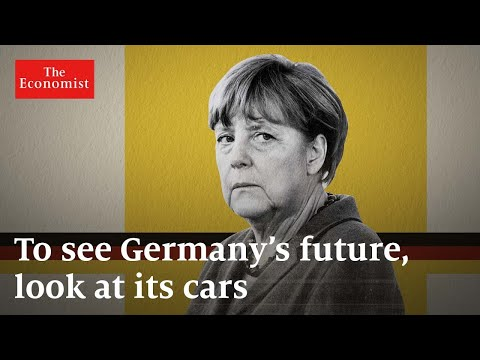

In [4]:
from IPython.display import YouTubeVideo 
YouTubeVideo(video_id)

In [5]:
transcript = YouTubeTranscriptApi.get_transcript(video_id)
transcript[0:5]

[{'text': "for Germany it's the end of an era and",
  'start': 1.439,
  'duration': 5.46},
 {'text': "as Europe's biggest economy there are",
  'start': 4.859,
  'duration': 4.801},
 {'text': 'some huge challenges ahead', 'start': 6.899, 'duration': 4.32},
 {'text': 'from its increasingly complex', 'start': 9.66, 'duration': 3.84},
 {'text': 'relationship with China to climate',
  'start': 11.219,
  'duration': 4.98}]

In [6]:
result = "" 
for i in transcript:
    result += i["text"] + " " 
# print(result)
print(len(result))

9003


In [7]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
2022-08-10 19:19:43.045096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-10 19:19:43.109215: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-08-10 19:19:43.109235: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-08-10 19:19:43.110480: I tensorflow/co

In [8]:
summarizer

In [9]:
num_iters = int(len(result)/1000) 
summarized_text = [] 
for i in range(0 , num_iters+1): 
    start = 0 
    start = i * 1000 
    end = (i+1) * 1000 
    # print("input text \n" , result[start:end]) 
    out = summarizer(result[start:end])  
    # print("output text \n" , out)
    out = out[0] 
    out = out["summary_text"] 
    summarized_text.append(out)
    # print("Summarized text \n" , out)

Your max_length is set to 142, but you input_length is only 4. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


In [10]:
len(str(summarized_text))

3166

In [11]:
summarized_text

[" Germany's car industry is a vital part of its economy with links to government that go back decades . The industry has proved of Bellwether for the country's future prospects too since the 70s car exports have risen with Germany's wealth and influence manufacturing manufacturing i i .",
 " In 2000 seven of the world's most valuable companies were German but in the past two decades that number has fallen to just three . Almost half of Germany's GDP comes from exports cars make up the biggest proportion of this who Germany Sells Cars to matters it can point to alliances or trouble brewing .",
 " There's a fear that Germany could have become too reliant on the Chinese market . Angela Merkel has courted China in the name of trade for the past 16 years . Germany's new leader will face the same challenge as its car industry how to keep their biggest trading partner on side without ending up in its pocket .",
 ' Two-thirds of German businesses said they still regularly used a fax machine a

In [12]:
str(summarized_text)

'[" Germany\'s car industry is a vital part of its economy with links to government that go back decades . The industry has proved of Bellwether for the country\'s future prospects too since the 70s car exports have risen with Germany\'s wealth and influence manufacturing manufacturing i i .", " In 2000 seven of the world\'s most valuable companies were German but in the past two decades that number has fallen to just three . Almost half of Germany\'s GDP comes from exports cars make up the biggest proportion of this who Germany Sells Cars to matters it can point to alliances or trouble brewing .", " There\'s a fear that Germany could have become too reliant on the Chinese market . Angela Merkel has courted China in the name of trade for the past 16 years . Germany\'s new leader will face the same challenge as its car industry how to keep their biggest trading partner on side without ending up in its pocket .", \' Two-thirds of German businesses said they still regularly used a fax mac

In [19]:
final_text =  " ".join(summarized_text)
type(final_text)

str